# Offline Evaluation Metrics Visualizations
This notebook visualizes user-specific performance metrics of various recommenders in the mind-subset dataset to assess effectiveness and ranking overlap. We explore two metric groups:
1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Reciprocal Rank (RR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to final rankings.

## 1. Setup

### 1. 1 Importing Libraries

PyData packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Local code:

In [2]:
from IPython.display import HTML

from poprox_recommender.eval_tables import EvalTable

Set up progress:

In [3]:
from tqdm.autonotebook import tqdm as notebook_tqdm

/tmp/ipykernel_363318/2439040576.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm as notebook_tqdm


### 1. 2 Loading Data

In [4]:
mind_subset_user_metrics = pd.read_csv("../outputs/mind-subset/profile-metrics.csv.gz")
mind_subset_user_metrics.head()

,Unnamed: 0,profile_id,recommender,personalized,NDCG@5,NDCG@10,RR,RBO@5,RBO@10
0,0,0120aa53-e102-5328-8a96-2a71a9bf9083,nrms,True,0.63093,0.63093,0.333333,0.409510,0.651322
1,1,0120aa53-e102-5328-8a96-2a71a9bf9083,mmr,True,0.00000,0.00000,0.000000,0.203347,0.235416
2,2,0120aa53-e102-5328-8a96-2a71a9bf9083,pfar,True,0.63093,0.63093,0.333333,0.409510,0.651322
3,3,0120aa53-e102-5328-8a96-2a71a9bf9083,topic-cali,True,0.63093,0.63093,0.333333,0.409510,0.651322
4,4,0120aa53-e102-5328-8a96-2a71a9bf9083,locality-cali,True,0.63093,0.63093,0.333333,0.409510,0.651322


In [5]:
effectiveness_metrics = ["NDCG@5", "NDCG@10", "RR"]
overlap_metrics = ["RBO@5", "RBO@10"]

## 2. Results

### 2. 1 Effectiveness Metrics
NDCG measures how well the recommendations align with user test data, focusing on the top-k positions, such as the top 5 (NDCG@5) or top 10 (NDCG@10). Likewise, RR evaluates how well the recommender finds the most relevant item as the top result.

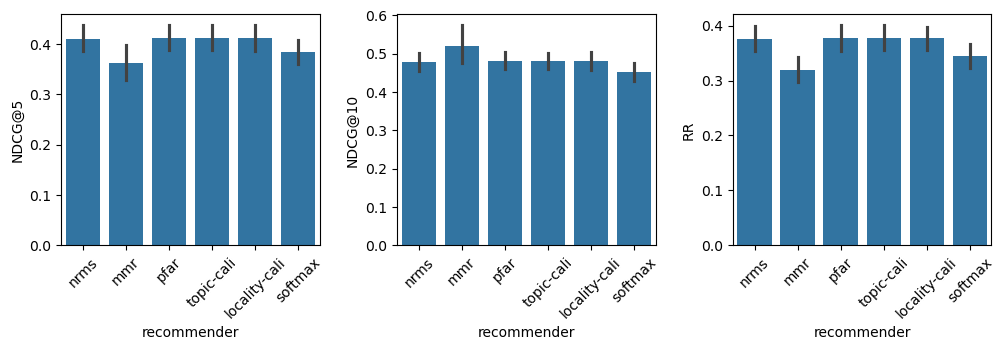

In [6]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(effectiveness_metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=mind_subset_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for effectiveness metrics across recommenders.

In [7]:
for metric in effectiveness_metrics:
    tw = EvalTable(mind_subset_user_metrics, "recommender", metric, progress=notebook_tqdm)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:00<00:01,  4.59it/s]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:00<00:00,  4.68it/s]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:00<00:00,  4.69it/s]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [00:00<00:00,  4.71it/s]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [00:01<00:00,  4.70it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.69it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.69it/s]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:00<00:01,  2.80it/s]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:00<00:01,  2.83it/s]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:01<00:01,  2.79it/s]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [00:01<00:00,  2.79it/s]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [00:01<00:00,  2.77it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.77it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.78it/s]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:01<00:05,  1.03s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:02<00:04,  1.02s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [00:03<00:03,  1.02s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [00:04<00:02,  1.02s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [00:05<00:01,  1.02s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.02s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.02s/it]

"locality-cali 0.413(0.387,0.438)","0.410(0.401,0.419)","0.000(0.000,0.000)","0.380(0.315,0.431)","1.000(1.000,1.000)",
"mmr 0.363(0.328,0.396)","0.554(0.510,0.601)","0.000(0.000,0.000)","0.000(0.000,0.000)","1.000(1.000,1.000)",
"nrms 0.410(0.384,0.436)","0.408(0.399,0.418)","0.000(0.000,0.000)","0.380(0.315,0.431)","1.000(1.000,1.000)",
"pfar 0.413(0.387,0.438)","0.410(0.401,0.420)","0.000(0.000,0.000)","0.380(0.315,0.431)","1.000(1.000,1.000)",
"softmax 0.384(0.359,0.409)","0.407(0.398,0.418)","0.000(0.000,0.000)","0.250(0.215,0.380)","1.000(1.000,1.000)",
"topic-cali 0.413(0.387,0.438)","0.410(0.401,0.419)","0.000(0.000,0.000)","0.380(0.315,0.431)","1.000(1.000,1.000)",


Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:00<00:01,  2.96it/s]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:00<00:01,  3.75it/s]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:00<00:00,  4.11it/s]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [00:00<00:00,  4.25it/s]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [00:01<00:00,  4.42it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.48it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.22it/s]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:00<00:01,  2.78it/s]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:00<00:01,  2.77it/s]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:01<00:01,  2.77it/s]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [00:01<00:00,  2.77it/s]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [00:01<00:00,  2.78it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.77it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.77it/s]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:01<00:05,  1.04s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:02<00:04,  1.04s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [00:03<00:03,  1.04s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [00:04<00:02,  1.04s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [00:05<00:01,  1.03s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.03s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.04s/it]

"locality-cali 0.480(0.457,0.503)","0.368(0.359,0.378)","0.000(0.000,0.000)","0.431(0.395,0.457)","1.000(1.000,1.000)",
"mmr 0.520(0.467,0.570)","0.826(0.737,0.924)","0.000(0.000,0.000)","0.333(0.315,0.356)","1.000(1.000,1.000)",
"nrms 0.477(0.454,0.500)","0.367(0.357,0.376)","0.000(0.000,0.000)","0.431(0.395,0.455)","1.000(1.000,1.000)",
"pfar 0.480(0.457,0.502)","0.368(0.359,0.378)","0.000(0.000,0.000)","0.431(0.395,0.457)","1.000(1.000,1.000)",
"softmax 0.451(0.428,0.474)","0.370(0.361,0.381)","0.000(0.000,0.000)","0.387(0.380,0.431)","1.000(1.000,1.000)",
"topic-cali 0.480(0.457,0.503)","0.368(0.359,0.378)","0.000(0.000,0.000)","0.431(0.394,0.455)","1.000(1.000,1.000)",


Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:00<00:01,  4.20it/s]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:00<00:00,  4.59it/s]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:00<00:00,  4.74it/s]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [00:00<00:00,  4.81it/s]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [00:01<00:00,  4.84it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.87it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.78it/s]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:00<00:01,  2.83it/s]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:00<00:01,  2.84it/s]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:01<00:01,  2.86it/s]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [00:01<00:00,  2.88it/s]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [00:01<00:00,  2.90it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.91it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.89it/s]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:01<00:05,  1.03s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:02<00:04,  1.03s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [00:03<00:03,  1.03s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [00:04<00:02,  1.03s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [00:05<00:01,  1.03s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.03s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.03s/it]

"locality-cali 0.377(0.355,0.400)","0.364(0.353,0.377)","0.000(0.000,0.000)","0.250(0.225,0.250)","1.000(1.000,1.000)",
"mmr 0.320(0.296,0.344)","0.385(0.372,0.399)","0.000(0.000,0.000)","0.143(0.143,0.167)","1.000(1.000,1.000)",
"nrms 0.377(0.354,0.399)","0.364(0.353,0.377)","0.000(0.000,0.000)","0.250(0.200,0.250)","1.000(1.000,1.000)",
"pfar 0.377(0.355,0.399)","0.364(0.353,0.377)","0.000(0.000,0.000)","0.250(0.200,0.250)","1.000(1.000,1.000)",
"softmax 0.345(0.323,0.366)","0.353(0.340,0.367)","0.000(0.000,0.000)","0.200(0.200,0.250)","1.000(1.000,1.000)",
"topic-cali 0.377(0.354,0.400)","0.364(0.353,0.377)","0.000(0.000,0.000)","0.250(0.225,0.250)","1.000(1.000,1.000)",


### 2. 2 Ranking Overlap Metrics
RBO measures the similarity between two ranked lists, evaluating how much overlap exists between pure top-k recommendations and the actual rankings produced after recommendations. RBO can be applied at different list depths to analyze performance consistency, such as RBO@5 and RBO@10.

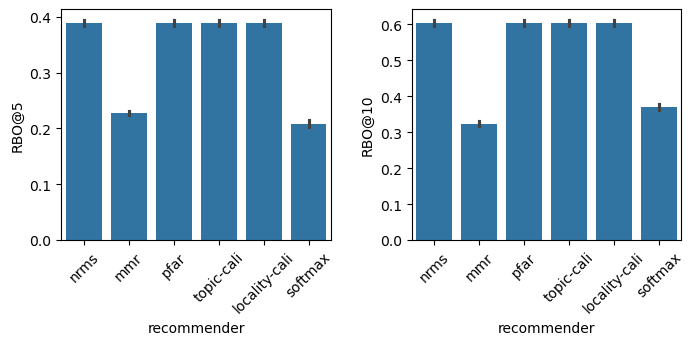

In [8]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(overlap_metrics, 1):
    plt.subplot(1, 2, i)
    sns.barplot(data=mind_subset_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for ranking overlap metrics across recommenders.

In [9]:
for metric in overlap_metrics:
    tw = EvalTable(mind_subset_user_metrics, "recommender", metric, progress=notebook_tqdm)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:00<00:01,  3.98it/s]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:00<00:00,  4.33it/s]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:00<00:00,  4.40it/s]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [00:00<00:00,  4.45it/s]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [00:01<00:00,  4.53it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.51it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.45it/s]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:00<00:01,  2.76it/s]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:00<00:01,  2.77it/s]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:01<00:01,  2.78it/s]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [00:01<00:00,  2.75it/s]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [00:01<00:00,  2.76it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.77it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.76it/s]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:00<00:04,  1.03it/s]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:02<00:04,  1.02s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [00:02<00:02,  1.01it/s]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [00:03<00:01,  1.02it/s]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [00:05<00:01,  1.02s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.01s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.00s/it]

"locality-cali 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"mmr 0.227(0.223,0.231)","0.061(0.056,0.066)","0.203(0.203,0.203)","0.203(0.203,0.216)","0.307(0.307,0.307)",
"nrms 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"pfar 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"softmax 0.209(0.202,0.215)","0.108(0.105,0.112)","0.058(0.044,0.071)","0.216(0.206,0.220)","0.351(0.346,0.364)",
"topic-cali 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",


Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:00<00:01,  3.99it/s]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:00<00:00,  4.32it/s]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:00<00:00,  4.35it/s]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [00:00<00:00,  4.43it/s]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [00:01<00:00,  4.40it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.45it/s]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.39it/s]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:00<00:01,  2.78it/s]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:00<00:01,  2.76it/s]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:01<00:01,  2.75it/s]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [00:01<00:00,  2.75it/s]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [00:01<00:00,  2.74it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.75it/s]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.75it/s]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:01<00:05,  1.02s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:02<00:04,  1.06s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [00:03<00:03,  1.03s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [00:04<00:02,  1.02s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [00:05<00:01,  1.05s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.03s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.03s/it]

"locality-cali 0.604(0.596,0.612)","0.133(0.118,0.150)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"mmr 0.323(0.317,0.330)","0.107(0.101,0.113)","0.235(0.235,0.235)","0.309(0.299,0.321)","0.453(0.453,0.472)",
"nrms 0.604(0.596,0.612)","0.133(0.118,0.150)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"pfar 0.604(0.596,0.612)","0.133(0.118,0.150)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"softmax 0.371(0.362,0.380)","0.142(0.136,0.148)","0.180(0.166,0.201)","0.374(0.371,0.390)","0.549(0.534,0.562)",
"topic-cali 0.604(0.596,0.612)","0.133(0.119,0.150)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
